In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['total_bill','tip']] = scaler.fit_transform(df[['total_bill','tip']])
df


,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,2
1,-1.063235,-0.969205,Male,No,Sun,Dinner,3
2,0.137780,0.363356,Male,No,Sun,Dinner,3
3,0.438315,0.225754,Male,No,Sun,Dinner,2
4,0.540745,0.443020,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,3
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,2
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,2
242,-0.221287,-0.904026,Male,No,Sat,Dinner,2


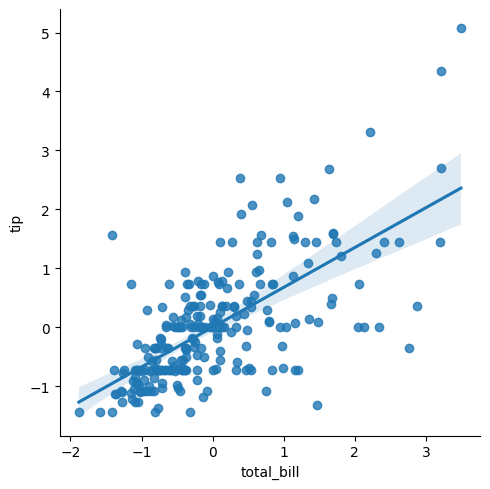

In [24]:
sns.lmplot(x="total_bill",y="tip",data=df)

In [25]:
X=df[['total_bill']]
y=df[['tip']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
model.predict([[15]])

array([[9.90386218]])

In [37]:
y_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MSE: 0.480250458832413
R2 Score: 0.4913802863248372
MAE: 0.49857631188024576
RMSE: 0.6930010525478392
MAPE: 36.952931933870126


# If we have big data which takes time to fit then we use pickle

In [38]:
import pickle
import os

filename = 'model.pkl'

# Save the model only if it doesn't already exist
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

#save the model
with open('saved_models/' + filename, 'wb') as file:
    pickle.dump(model, file)

In [39]:
#laod the model

with open('saved_models/' + filename, 'rb') as file:
    loaded_model = pickle.load(file)
    
y_pred=loaded_model.predict(X_test)